Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from glob import glob
     


In [3]:
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D

In [4]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
!ls

gdrive	sample_data


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [6]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset

# root_path = '/content/gdrive/MyDrive/temporary_delete/CNN_assignment/Skin_cancer_ISIC'
data_dir_train = pathlib.Path('/content/gdrive/MyDrive/temporary_delete/CNN_assignment/Skin_cancer_ISIC /Train')
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/temporary_delete/CNN_assignment/Skin_cancer_ISIC /Test')

In [7]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2252
121


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [8]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [9]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/MyDrive/temporary_delete/CNN_assignment/Skin_cancer_ISIC /Train",
    batch_size = 32, image_size = (img_height, img_width), 
    seed = 123, validation_split = 0.2, subset = "training"
)

Found 2252 files belonging to 9 classes.
Using 1802 files for training.


In [10]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/MyDrive/temporary_delete/CNN_assignment/Skin_cancer_ISIC /Train", 
    batch_size = 32, image_size = (img_height, img_width), 
    seed = 123, validation_split = 0.2, subset = "validation"
)

Found 2252 files belonging to 9 classes.
Using 450 files for validation.


In [11]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

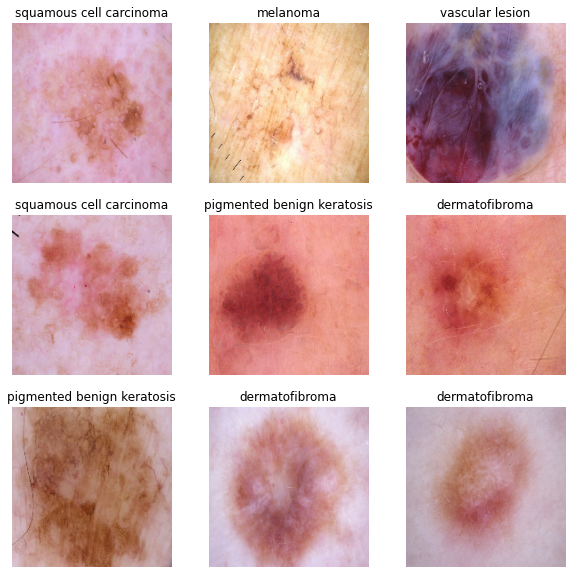

In [11]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [12]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [14]:
### Your code goes here
preprocessing_layers = [
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3))
]


In [19]:
input_shape = (img_height,img_width,3)
lr = 1e-5
init = 'normal'
activ = 'relu'

model = Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, 3, padding='same', activation=activ),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation=activ),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation=activ),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation=activ),
    layers.Dense(9, activation='softmax')
])


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [20]:
### Todo, choose an appropirate optimiser and loss function
### Todo, choose an appropirate optimiser and loss function


optimizer = 'adam'
loss_fn = "sparse_categorical_crossentropy"
model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])
     

In [21]:
model.build()

In [22]:
# View the summary of all layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 128)      

In [23]:

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

### Train the model

In [24]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 86s 1s/step - loss: 2.0673 - accuracy: 0.2553 - val_loss: 1.7101 - val_accuracy: 0.4089
Epoch 2/20
57/57 [==============================] - 2s 41ms/step - loss: 1.5822 - accuracy: 0.4539 - val_loss: 1.6128 - val_accuracy: 0.4000
Epoch 3/20
57/57 [==============================] - 2s 41ms/step - loss: 1.4751 - accuracy: 0.4834 - val_loss: 1.4883 - val_accuracy: 0.4933
Epoch 4/20
57/57 [==============================] - 2s 41ms/step - loss: 1.2763 - accuracy: 0.5516 - val_loss: 1.3913 - val_accuracy: 0.5000
Epoch 5/20
57/57 [==============================] - 2s 41ms/step - loss: 1.1729 - accuracy: 0.5866 - val_loss: 1.4599 - val_accuracy: 0.4889
Epoch 6/20
57/57 [==============================] - 2s 41ms/step - loss: 1.1085 - accuracy: 0.6165 - val_loss: 1.4129 - val_accuracy: 0.5244
Epoch 7/20
57/57 [==============================] - 2s 41ms/step - loss: 1.0437 - accuracy: 0.6365 - val_loss: 1.3947 - val_accuracy: 0.5289
Epoch 8/20
57/

### Visualizing training results

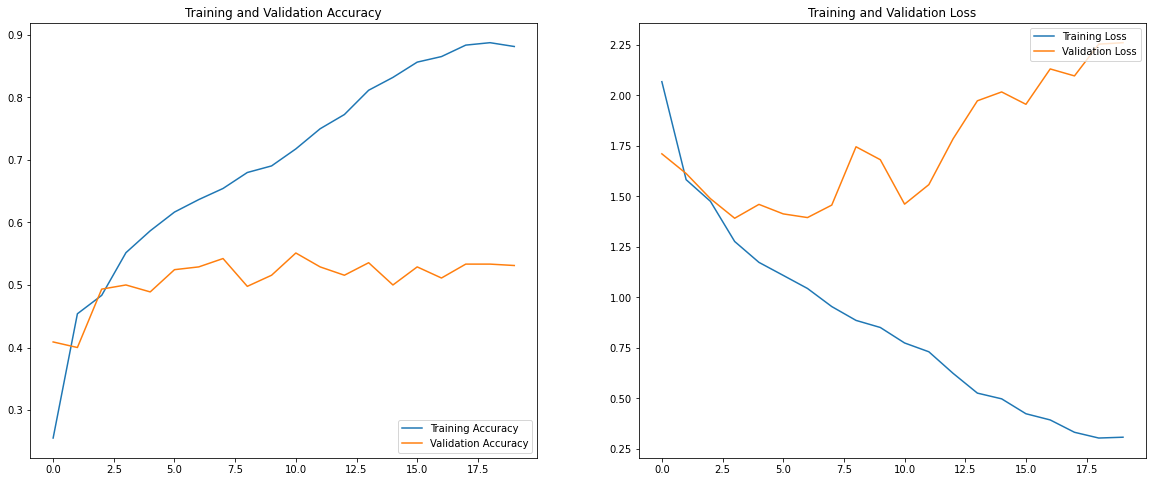

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

Note: It is clearly evident from above that the model shows overfitting.

There are two observations to justify overfitting:

After 20 epochs, we could see that validation losses are higher than training losses, and also validation accuracy drastically reduced compared to training accuracy

Training loss: 0.3074 Vs Validation loss: 2.2603
Training accuracy: 0.8812 Vs Validation accuracy: 0.5311
The above Graph shows difference in the training and validation w.r.t accuracy and losses.

The above Graph shows difference in the training and validation w.r.t accuracy and losses.

# Augmentation


In [26]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation = keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

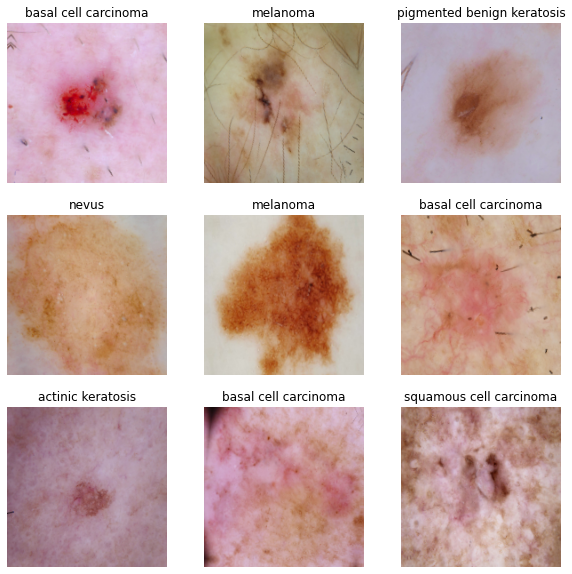

In [27]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(
            tf.expand_dims(images[i], 0), training=True
        )
        plt.imshow(augmented_image[0].numpy().astype("int32"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")

# Create the model,compile and train the model

In [32]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.15),
    layers.Dense(128, activation='relu'),
    layers.Dense(9, activation='softmax')
])
    

### Compiling the model

In [33]:
## Your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
model.build()

In [35]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_2 (RandomFlip)  (None, 180, 180, 3)       0         
                                                                 
 random_rotation_2 (RandomRo  (None, 180, 180, 3)      0         
 tation)                                                         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 64)       

### Training the model

In [36]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs = epochs
)

Epoch 1/20


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


57/57 [==============================] - 4s 60ms/step - loss: 2.0684 - accuracy: 0.2536 - val_loss: 1.7857 - val_accuracy: 0.3733
Epoch 2/20
57/57 [==============================] - 3s 56ms/step - loss: 1.6707 - accuracy: 0.3946 - val_loss: 1.6406 - val_accuracy: 0.3867
Epoch 3/20
57/57 [==============================] - 3s 56ms/step - loss: 1.5436 - accuracy: 0.4434 - val_loss: 1.6191 - val_accuracy: 0.4356
Epoch 4/20
57/57 [==============================] - 3s 57ms/step - loss: 1.4175 - accuracy: 0.5111 - val_loss: 1.5886 - val_accuracy: 0.4733
Epoch 5/20
57/57 [==============================] - 3s 57ms/step - loss: 1.3480 - accuracy: 0.5239 - val_loss: 1.4105 - val_accuracy: 0.5022
Epoch 6/20
57/57 [==============================] - 3s 57ms/step - loss: 1.3237 - accuracy: 0.5333 - val_loss: 1.3718 - val_accuracy: 0.5178
Epoch 7/20
57/57 [==============================] - 3s 56ms/step - loss: 1.3386 - accuracy: 0.5017 - val_loss: 1.4424 - val_accuracy: 0.4733
Epoch 8/20
57/57 [======

### Visualizing the results

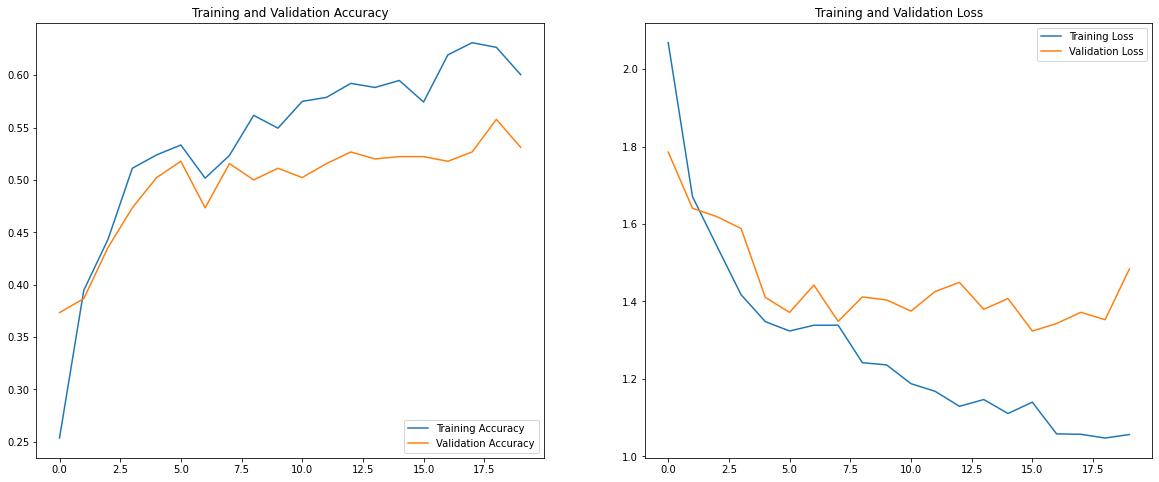

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

As per the above model 2 result, the current model is not overfit, and it performs better than previous model after adding Augumentation strategy and dropout method.

Please find the training and validation accuracy:

The training accuracy: 0.6004 & validation accuracy: 0.5311
The training loss: 1.0564 & validation loss: 1.4839

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [38]:
# get the count of class names by its path for each class.

total_image_count = len(list(data_dir_train.glob('**/*/*.jpg')))
perc_class = {}
for name in class_names:
    perc_class[name] = round((len(list(data_dir_train.glob('{0}/*.jpg'.format(name)))) / total_image_count)*100,2)
df = pd.DataFrame(list(perc_class.items()), columns=['Class', 'Distribution Percentage'])

df

,Class,Distribution Percentage
0,actinic keratosis,5.06
1,basal cell carcinoma,16.70
2,dermatofibroma,4.22
3,melanoma,19.45
4,nevus,15.85
5,pigmented benign keratosis,21.00
6,seborrheic keratosis,3.42
7,squamous cell carcinoma,8.13
8,vascular lesion,6.17


In [39]:
# Creating dataframe for class name and its count.


# Get the distribution of data for each class
total_count = 0
data_dict = {}
for name in class_names:
    data_dict[name] = len(list(data_dir_train.glob('{0}/*.jpg'.format(name))))
    total_count += len(list(data_dir_train.glob('{0}/*.jpg'.format(name))))

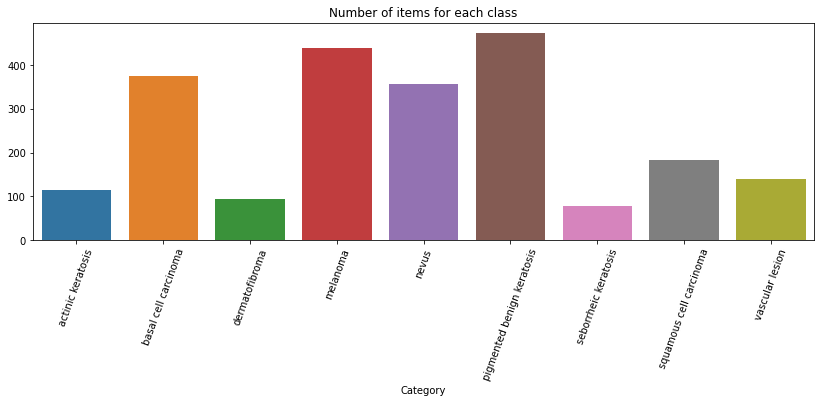

In [41]:
# Plot the distribution of data using bar plot
import seaborn as sns
f, ax = plt.subplots(1,1, figsize=(14,4))
g = sns.barplot(x=list(data_dict.keys()), y = list(data_dict.values()))
g.set_title("Number of items for each class")
g.set_xlabel("Category")
plt.xticks(rotation=70)
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Answer : The class **"seborrheic keratosis"** has least number of samples ie. 77
#### - Which classes dominate the data in terms proportionate number of samples?
#### -  The class  **"pigmented benign keratosis"** dominates the data as it contains 462 samples.


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [42]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [43]:
path_to_training_dataset="/content/gdrive/MyDrive/temporary_delete/CNN_assignment/Skin_cancer_ISIC /Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/temporary_delete/CNN_assignment/Skin_cancer_ISIC /Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F08D017BB20>: 100%|██████████| 500/500 [00:20<00:00, 23.86 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/temporary_delete/CNN_assignment/Skin_cancer_ISIC /Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F08D0406C70>: 100%|██████████| 500/500 [00:17<00:00, 27.81 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/temporary_delete/CNN_assignment/Skin_cancer_ISIC /Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F091D0E3CD0>: 100%|██████████| 500/500 [00:17<00:00, 28.11 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/temporary_delete/CNN_assignment/Skin_cancer_ISIC /Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x7F0970163AC0>: 100%|██████████| 500/500 [01:37<00:00,  5.11 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/temporary_delete/CNN_assignment/Skin_cancer_ISIC /Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F0907A25160>: 100%|██████████| 500/500 [01:25<00:00,  5.83 Samples/s]


Initialised with 473 image(s) found.
Output directory set to /content/gdrive/MyDrive/temporary_delete/CNN_assignment/Skin_cancer_ISIC /Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F097018B040>: 100%|██████████| 500/500 [00:18<00:00, 27.68 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/temporary_delete/CNN_assignment/Skin_cancer_ISIC /Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F09079EAE80>: 100%|██████████| 500/500 [00:41<00:00, 12.01 Samples/s]


Initialised with 183 image(s) found.
Output directory set to /content/gdrive/MyDrive/temporary_delete/CNN_assignment/Skin_cancer_ISIC /Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F09700D2820>: 100%|██████████| 500/500 [00:18<00:00, 27.61 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/temporary_delete/CNN_assignment/Skin_cancer_ISIC /Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0907B333D0>: 100%|██████████| 500/500 [00:17<00:00, 28.49 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [44]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [45]:
# Get the list of paths that originally had without Augumentor
org_path_list = [x for x in glob(os.path.join(data_dir_train, '*','*.jpg'))]
org_path_list

['/content/gdrive/MyDrive/temporary_delete/CNN_assignment/Skin_cancer_ISIC /Train/seborrheic keratosis/ISIC_0010834.jpg',
 '/content/gdrive/MyDrive/temporary_delete/CNN_assignment/Skin_cancer_ISIC /Train/seborrheic keratosis/ISIC_0010810.jpg',
 '/content/gdrive/MyDrive/temporary_delete/CNN_assignment/Skin_cancer_ISIC /Train/seborrheic keratosis/ISIC_0010812.jpg',
 '/content/gdrive/MyDrive/temporary_delete/CNN_assignment/Skin_cancer_ISIC /Train/seborrheic keratosis/ISIC_0010852.jpg',
 '/content/gdrive/MyDrive/temporary_delete/CNN_assignment/Skin_cancer_ISIC /Train/seborrheic keratosis/ISIC_0010909.jpg',
 '/content/gdrive/MyDrive/temporary_delete/CNN_assignment/Skin_cancer_ISIC /Train/seborrheic keratosis/ISIC_0010863.jpg',
 '/content/gdrive/MyDrive/temporary_delete/CNN_assignment/Skin_cancer_ISIC /Train/seborrheic keratosis/ISIC_0010866.jpg',
 '/content/gdrive/MyDrive/temporary_delete/CNN_assignment/Skin_cancer_ISIC /Train/seborrheic keratosis/ISIC_0010862.jpg',
 '/content/gdrive/MyDriv

In [49]:

# Get the class names for each paths of original data
lesion_list_org = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
print(len(lesion_list_org))
     

2252


In [50]:

# Add both Path list and class names of original data
dataframe_dict_org = dict(zip(org_path_list, lesion_list_org))

In [51]:

# Create a dataframe using original data
df1 = pd.DataFrame(list(dataframe_dict_org.items()),columns = ['Path','Label'])
len(df1)

2252

In [52]:

# Get the list of paths that new added using Augumentor
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list
     

['/content/gdrive/MyDrive/temporary_delete/CNN_assignment/Skin_cancer_ISIC /Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011132.jpg_913083d9-100e-4bcc-8920-c634d0661849.jpg',
 '/content/gdrive/MyDrive/temporary_delete/CNN_assignment/Skin_cancer_ISIC /Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011140.jpg_56188c10-9dee-48b7-88c8-5f10120a680a.jpg',
 '/content/gdrive/MyDrive/temporary_delete/CNN_assignment/Skin_cancer_ISIC /Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011169.jpg_0f264d5b-41c4-46d6-bf24-d60b03b7ef38.jpg',
 '/content/gdrive/MyDrive/temporary_delete/CNN_assignment/Skin_cancer_ISIC /Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011040.jpg_2856f4a7-e5dc-4dd1-b658-8b5d88391ec9.jpg',
 '/content/gdrive/MyDrive/temporary_delete/CNN_assignment/Skin_cancer_ISIC /Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010872.jpg_cc327b62-db25-4bdf-a992-0788b6745818.jpg',


In [53]:
# Get the class names for each paths of newly added data
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',


In [54]:
# Add both Path list and class names of newly added data
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [55]:
# Create a dataframe using newly added data using Augumentor
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
# Merge orginal data with newly added data
new_df = df1.append(df2)
     

In [56]:
# Show the dsitribution of data after merging
new_df['Label'].value_counts()

pigmented benign keratosis    973
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       683
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [57]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [58]:
 data_dir_train="/content/gdrive/MyDrive/temporary_delete/CNN_assignment/Skin_cancer_ISIC /Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6752 files belonging to 9 classes.
Using 5402 files for training.


#### **Todo:** Create a validation dataset

In [59]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6752 files belonging to 9 classes.
Using 1350 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [60]:
## your code goes here
model = Sequential([

    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    layers.MaxPooling2D(),

    #layers.Conv2D(128, 3, padding='same', activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #layers.MaxPooling2D(),

    layers.Conv2D(256, 3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),

    layers.Dense(9, activation='softmax')
])
    

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [62]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [63]:
epochs = 30
## Your code goes here, use 30 epochs.
epochs = 30
history = model.fit(
    train_ds,
    validation_data = val_ds, 
    epochs = epochs
)

Epoch 1/30


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 37s 204ms/step - loss: 1.6993 - accuracy: 0.4298 - val_loss: 7.9165 - val_accuracy: 0.1074
Epoch 2/30
169/169 [==============================] - 36s 204ms/step - loss: 1.2928 - accuracy: 0.5283 - val_loss: 10.3294 - val_accuracy: 0.1415
Epoch 3/30
169/169 [==============================] - 34s 197ms/step - loss: 1.1663 - accuracy: 0.5690 - val_loss: 2.2411 - val_accuracy: 0.3815
Epoch 4/30
169/169 [==============================] - 34s 195ms/step - loss: 1.0758 - accuracy: 0.5989 - val_loss: 1.4811 - val_accuracy: 0.4956
Epoch 5/30
169/169 [==============================] - 34s 196ms/step - loss: 0.9669 - accuracy: 0.6409 - val_loss: 1.6323 - val_accuracy: 0.4770
Epoch 6/30
169/169 [==============================] - 34s 195ms/step - loss: 0.8805 - accuracy: 0.6718 - val_loss: 1.8098 - val_accuracy: 0.4578
Epoch 7/30
169/169 [==============================] - 36s 205ms/step - loss: 0.8563 - accuracy: 0.6738 - val_loss: 2.2092 - val_accuracy: 0.

#### **Todo:**  Visualize the model results

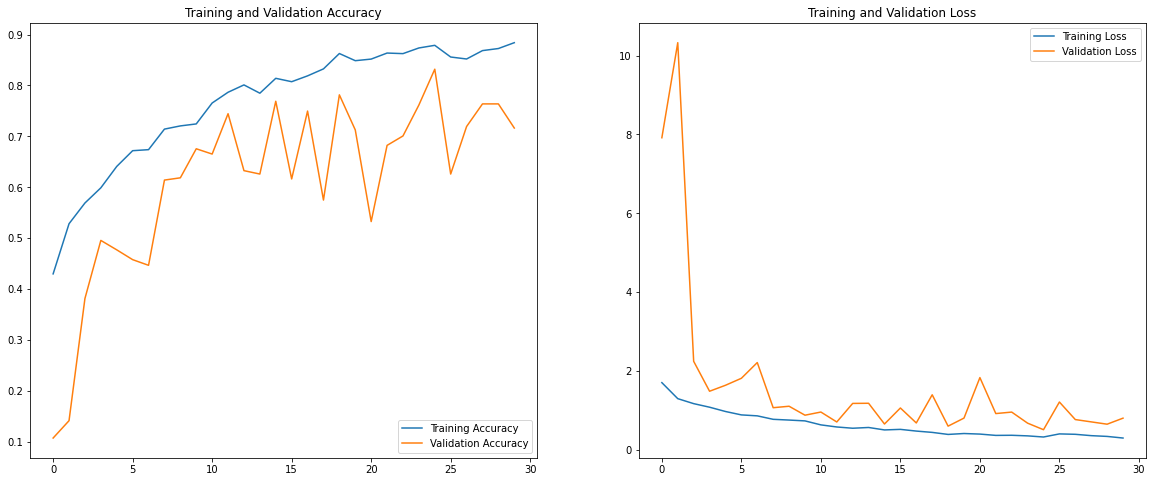

In [64]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



Summary:

1)The above model shows that model is less overfitted than the first models. This is because, we were able to resolve the class rebalance issue by adding more samples of images using Augumentor.

2)The model is able to predict well by using multiple layers of Convolution 2D (Upto 256).

3)Further, the model is able to generalize well by using Batch Normalization in multiple layers.

4)In addition to the above, dropout (0.5) has been added to generalize the model.

5)The training accuracy has improved with a value of 0.8839 whereas validation accuracy is now 0.7163.

6)The training loss is reduced to 0.2932 and validation loss is reduced to 0.7978
The model can be further improved by adding more images.